In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import re


pd.set_option('display.max_columns',None)

%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

n_sample = df.shape[0]
n_feature = df.shape[1]

df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [4]:
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [5]:
df.drop("policy_id", axis=1, inplace=True)

In [6]:
df['torque'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=Nm)', x)[0])
df['rpm'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=rpm)', x)[0])

# Convert the columns to numeric data type
df['torque'] = pd.to_numeric(df['torque'])
df['rpm'] = pd.to_numeric(df['rpm'])

# Calculate torque to RPM ratio 
df['torque to rpm ratio'] = df['torque'] / df['rpm']

df.drop(['max_torque', 'rpm', 'torque'], axis=1,inplace=True)

In [7]:
df['power'] = df['max_power'].apply(lambda x: re.findall(r'\d+\.?\d*(?=bhp)', x)[0])
df['rpm'] = df['max_power'].apply(lambda x: re.findall(r'\d+', x)[-1])

# Convert the columns to numeric data type
df['power'] = pd.to_numeric(df['power'])
df['rpm'] = pd.to_numeric(df['rpm'])

# Calculate power to RPM ratio
df['power to rpm ratio'] = df['power'] / df['rpm']


df.drop(['max_power', 'rpm', 'power'], axis=1,inplace=True)

In [8]:
for col in df.columns:
    print("values of " + col)
    print(df[col].unique())
    print()

values of policy_tenure
[0.51587359 0.67261851 0.84111026 ... 1.16227251 1.2363069  0.12442893]

values of age_of_car
[0.05 0.02 0.11 0.07 0.16 0.14 0.04 0.01 0.12 0.03 0.1  0.09 0.   0.08
 0.15 0.13 0.39 0.17 0.06 0.18 0.2  0.29 0.19 0.38 0.22 0.23 0.26 0.21
 0.27 0.28 0.3  0.25 0.31 0.33 0.35 0.32 0.24 0.37 1.   0.42 0.36 0.45
 0.49 0.46 0.34 0.82 0.44 0.62 0.81]

values of age_of_policyholder
[0.64423077 0.375      0.38461538 0.43269231 0.63461538 0.51923077
 0.40384615 0.42307692 0.29807692 0.44230769 0.59615385 0.48076923
 0.30769231 0.57692308 0.60576923 0.47115385 0.5        0.39423077
 0.61538462 0.31730769 0.32692308 0.49038462 0.46153846 0.92307692
 0.69230769 0.45192308 0.41346154 0.68269231 0.36538462 0.35576923
 0.50961538 0.53846154 0.67307692 0.34615385 0.54807692 0.28846154
 0.55769231 0.75961538 0.33653846 0.74038462 0.66346154 0.625
 0.52884615 0.58653846 0.65384615 0.73076923 0.56730769 0.70192308
 0.80769231 0.79807692 0.84615385 0.71153846 0.77884615 0.76923077
 0.

In [9]:
cat_features = df.select_dtypes(include=['object']).columns

print(cat_features)
print(f"Numbers of cat_features : {len(cat_features)}")


print()

label_features = [feat for feat in cat_features if df[feat].nunique() == 2]
print(label_features)
print(f"Numbers of label_features : {len(label_features)}")


print()


onehot_features = list(set(cat_features) - set(label_features))
print(onehot_features)
print(f"Numbers of onehot_features : {len(onehot_features)}")

print()

con_features = df.select_dtypes(include=['int', 'float']).columns

print(con_features)
print(f"Numbers of con_features : {len(con_features)}")


Index(['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')
Numbers of cat_features : 25

['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is

In [10]:
con_features = con_features.drop(["age_of_car", "age_of_policyholder", 'is_claim'])

In [11]:
standar = StandardScaler()

df[con_features] = pd.DataFrame(standar.fit_transform(df[con_features]), columns=con_features)

In [12]:
label_encoder = LabelEncoder()

for feat in label_features:
    df[feat] = label_encoder.fit_transform(df[feat])

In [13]:
df = pd.get_dummies(df, columns=onehot_features, drop_first=True)

In [14]:
df

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque to rpm ratio,power to rpm ratio,fuel_type_Diesel,fuel_type_Petrol,steering_type_Manual,steering_type_Power,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9
0,-0.230283,0.05,0.644231,-0.783513,-0.671712,-0.620458,0,0,0,1,0,1,-1.375713,-1.296417,1,-0.570334,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-0.804185,-1.143112,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.148188,0.02,0.375000,0.462975,-0.671712,-0.620458,0,0,0,1,0,1,-1.375713,-1.296417,1,-0.570334,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-0.804185,-1.143112,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.555022,0.02,0.384615,-0.835268,-0.671712,-0.620458,0,0,0,1,0,1,-1.375713,-1.296417,1,-0.570334,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-0.804185,-1.143112,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.697883,0.11,0.432692,0.158275,-0.671712,-0.620458,1,1,0,1,1,1,0.130093,0.771357,0,-0.570334,-0.231926,0.464026,0.559973,-0.481470,-0.236684,1,0,0,1,1,1,1,1,1,1,1,1,0.172752,0,-0.541661,-0.170737,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.035840,0.11,0.634615,0.900969,0.207812,-0.620458,0,0,0,0,1,1,-0.613422,-1.296417,0,-0.570334,0.645040,-0.383610,-0.831789,-0.795455,-1.084057,0,0,0,0,0,1,1,1,0,1,1,1,0.172752,0,-0.672941,-0.480661,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,-0.618508,0.13,0.644231,-0.568111,0.207812,-0.620458,0,0,0,0,1,1,-0.613422,-1.296417,0,-0.570334,0.645040,-0.383610,-0.831789,-0.795455,-1.084057,0,0,0,0,0,1,1,1,0,1,1,1,0.172752,0,-0.672941,-0.480661,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
58588,1.420720,0.02,0.519231,-0.625076,-0.671712,-0.620458,0,0,0,1,0,1,-1.375713,-1.296417,1,-0.570334,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-0.804185,-1.143112,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58589,1.330490,0.05,0.451923,0.900969,-0.671712,-0.620458,0,0,0,1,0,1,-1.375713,-1.29641

### Pie chart 

In [15]:
df["is_claim"].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [16]:
df["is_claim"].value_counts()/df["is_claim"].count()

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

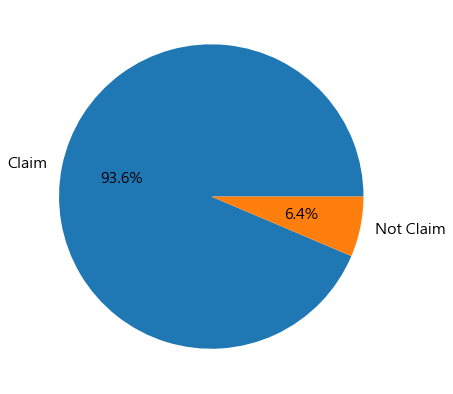

In [17]:
#plot pie chart in is_claim

plt.figure(figsize=(10, 7))
plt.pie(df["is_claim"].value_counts()/df["is_claim"].count(),
        labels=["Claim", "Not Claim"],
        textprops={"size" : 15},
        autopct="%.1f%%")

plt.show()

In [18]:
from sklearn.utils import resample

In [19]:
x0 = df[df["is_claim" ]== 0]
x1 = df[df["is_claim"] == 1]

x0 = resample(x0, replace=False, n_samples=2 * len(x1), random_state=85)


df_under = pd.concat([x0, x1], ignore_index=True)

In [20]:
X = df_under.drop("is_claim", axis=1).values
y = df_under["is_claim"].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3 , random_state=85)

In [21]:
import model

lc = model.linearclassifier()
knn = model.KNN(K =3)
nativeDT = model.DecisionTree()
DT = model.DecisionTree(min_sample_spilt=20)

## Linear Classifier

In [22]:
lc.fit(Xtrain, ytrain)

100%|██████████| 1000/1000 [00:01<00:00, 681.60it/s]


In [23]:
lc.score(Xtest, ytest)

0.6662714878482513

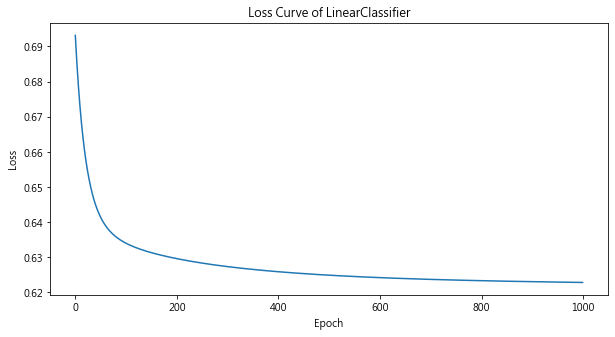

In [24]:
plt.figure(figsize=(10,5))

plt.plot(range(lc.epochs), lc.history_loss)

plt.title("Loss Curve of LinearClassifier")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

[ 0 32 11 28 19  9 27 26 31 14]


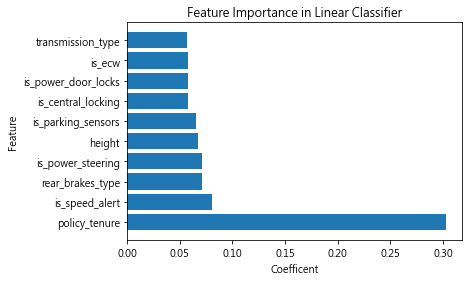

In [25]:
importance_index = lc.feature_importance()

print(importance_index)

plt.barh(df.columns[importance_index], np.abs(lc.w)[importance_index])

plt.title("Feature Importance in Linear Classifier")
plt.xlabel("Coefficent")
plt.ylabel("Feature")

plt.show()

## KNN

In [26]:
knn.fit(Xtrain, ytrain)

In [27]:
knn.score(Xtest, ytest)

100%|██████████| 3374/3374 [00:54<00:00, 62.46it/s]


0.5699466508595139

## Native DT

In [28]:
# nativeDT.fit(Xtrain, ytrain)

In [29]:
# nativeDT.predict(Xtest)

In [30]:
# nativeDT.score(Xtest, ytest)

In [31]:
# nativeDT.feature_importance

In [32]:
# importance_index = np.argsort(nativeDT.feature_importance)[::-1][:10]

# feature_importance = nativeDT.feature_importance / np.sum(nativeDT.feature_importance)

In [33]:
# plt.barh(df.columns[importance_index],feature_importance[importance_index])

# plt.title("Feature Importance in Linear Classifier")
# plt.xlabel("Coefficent")
# plt.ylabel("Feature")

# plt.show()

## Puring DT

In [34]:
# DT.fit(Xtrain, ytrain)

## SHAP

In [35]:
# import shap

In [36]:
# explainer = shap.Explainer(nativeDT.predict, Xtrain[:500])

In [37]:
# shap_values = explainer(Xtrain[:500])

In [38]:
# shap.plots.bar(shap_values, max_display=10)

## KFold

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

In [40]:
values_K = [3, 5, 10]

In [41]:
def Kfold_result(Xtrain, ytrain, Xtest, model, k):

    ss = StratifiedShuffleSplit(n_splits=k, train_size=0.7, random_state=85)

    k_pred = []

    print(f"K = {k}")
    
    for i, (train_index, test_index) in enumerate(ss.split(X, y)):
        Xtrain, ytrain = X[train_index], y[train_index]
        Xval, yval = X[test_index], y[test_index]
        model = model
        model.fit(Xtrain, ytrain)        
        acc = model.score(Xval, yval)
        
        pred = model.predict(Xtest)
        k_pred.append(pred)
        
        print(f"K = {i + 1} / {k}, Test accuracy = {acc : .2%}")

    return np.array(k_pred)



In [42]:
def mix_k_pred(pred):

    mix_result = []

    for i in range(np.shape(pred)[1]):    

        pred_mix_k_fold = np.argmax(np.bincount(pred[:,i]))

        mix_result.append(pred_mix_k_fold)

    return np.array(mix_result)

In [45]:
def k_fold(Xtrain, ytrain, Xtest, model, values_K):

    for k in values_K:

        pred = Kfold_result(Xtrain, ytrain, Xtest, model=model, k=k)

        mix_result = mix_k_pred(pred)

        acc = np.sum(mix_result == ytest) / len(ytest)

        print(f"The accuray of merge the predcited result from k classifiers : {acc: .2%}")

In [47]:
k_fold(Xtrain, ytrain, Xtest, model.linearclassifier(), values_K)

K = 3


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 816.20it/s]


K = 1 / 3, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:01<00:00, 838.87it/s]


K = 2 / 3, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:01<00:00, 843.92it/s]


K = 3 / 3, Test accuracy =  66.66%
The accuray of merge the predcited result from k classifiers :  66.63%
K = 5


100%|██████████| 1000/1000 [00:01<00:00, 859.49it/s]


K = 1 / 5, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:01<00:00, 856.65it/s]


K = 2 / 5, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:01<00:00, 906.70it/s]


K = 3 / 5, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:01<00:00, 896.14it/s]


K = 4 / 5, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:01<00:00, 652.27it/s]


K = 5 / 5, Test accuracy =  66.66%
The accuray of merge the predcited result from k classifiers :  66.63%
K = 10


100%|██████████| 1000/1000 [00:01<00:00, 668.39it/s]


K = 1 / 10, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:01<00:00, 634.88it/s]


K = 2 / 10, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:02<00:00, 453.05it/s]


K = 3 / 10, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:01<00:00, 685.49it/s]


K = 4 / 10, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:02<00:00, 429.95it/s]


K = 5 / 10, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:01<00:00, 681.39it/s]


K = 6 / 10, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:01<00:00, 697.19it/s]


K = 7 / 10, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:01<00:00, 752.77it/s]


K = 8 / 10, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:01<00:00, 730.46it/s]


K = 9 / 10, Test accuracy =  66.66%


100%|██████████| 1000/1000 [00:01<00:00, 789.17it/s]

K = 10 / 10, Test accuracy =  66.66%
The accuray of merge the predcited result from k classifiers :  66.63%


In [49]:
k_fold(Xtrain, ytrain, Xtest, model.KNN(), values_K)

K = 3


100%|██████████| 3374/3374 [00:28<00:00, 119.82it/s]


K = 1 / 3, Test accuracy =  57.53%


100%|██████████| 3374/3374 [00:26<00:00, 124.99it/s]


K = 2 / 3, Test accuracy =  57.50%


100%|██████████| 3374/3374 [00:29<00:00, 113.81it/s]


K = 3 / 3, Test accuracy =  57.65%
The accuray of merge the predcited result from k classifiers :  93.21%
K = 5


100%|██████████| 3374/3374 [00:25<00:00, 132.88it/s]


K = 1 / 5, Test accuracy =  57.53%


100%|██████████| 3374/3374 [00:26<00:00, 129.23it/s]


K = 2 / 5, Test accuracy =  57.50%


100%|██████████| 3374/3374 [00:27<00:00, 124.59it/s]


K = 3 / 5, Test accuracy =  57.65%


100%|██████████| 3374/3374 [00:25<00:00, 132.47it/s]


K = 4 / 5, Test accuracy =  57.94%


100%|██████████| 3374/3374 [00:25<00:00, 131.69it/s]


K = 5 / 5, Test accuracy =  56.22%
The accuray of merge the predcited result from k classifiers :  95.35%
K = 10


100%|██████████| 3374/3374 [00:25<00:00, 134.26it/s]


K = 1 / 10, Test accuracy =  57.53%


100%|██████████| 3374/3374 [00:25<00:00, 130.93it/s]


K = 2 / 10, Test accuracy =  57.50%


100%|██████████| 3374/3374 [00:26<00:00, 126.55it/s]


K = 3 / 10, Test accuracy =  57.65%


100%|██████████| 3374/3374 [00:25<00:00, 132.32it/s]


K = 4 / 10, Test accuracy =  57.94%


100%|██████████| 3374/3374 [00:25<00:00, 131.82it/s]


K = 5 / 10, Test accuracy =  56.22%


100%|██████████| 3374/3374 [00:26<00:00, 127.06it/s]


K = 6 / 10, Test accuracy =  56.28%


100%|██████████| 3374/3374 [00:26<00:00, 126.44it/s]


K = 7 / 10, Test accuracy =  57.20%


100%|██████████| 3374/3374 [00:26<00:00, 128.65it/s]


K = 8 / 10, Test accuracy =  58.62%


100%|██████████| 3374/3374 [00:25<00:00, 130.53it/s]


K = 9 / 10, Test accuracy =  57.26%


100%|██████████| 3374/3374 [00:25<00:00, 133.08it/s]

K = 10 / 10, Test accuracy =  56.25%
The accuray of merge the predcited result from k classifiers :  97.07%
